In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [3]:
food_waste = pd.read_csv("01_음식물쓰레기_FOOD_WASTE.csv", encoding='cp949')
korean = pd.read_csv("02-1_내국인유동인구_KOREAN.csv", encoding='cp949')

C:\Users\dayfl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [5]:
food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110540,이도2동,W6X063,26,64650,1933
2,2018-01-01,제주시,50110630,아라동,W6X064,15,33500,1001
3,2018-01-01,제주시,50110610,삼양동,W6X065,4,8400,252
4,2018-01-01,제주시,50110540,이도2동,W6X066,21,51450,1538
...,...,...,...,...,...,...,...,...
2209856,2020-12-14,서귀포시,50130250,대정읍,W6Y722,16,26950,805
2209857,2020-12-14,서귀포시,50130250,대정읍,W6Y72A,3,17000,510
2209858,2020-12-14,서귀포시,50130310,안덕면,W6Y72B,5,5650,168
2209859,2020-12-14,서귀포시,50130310,안덕면,W6Y72C,11,20700,619


In [6]:
food_waste['base_date'] = pd.to_datetime(food_waste['base_date'])

In [7]:
food_waste['year'] = food_waste['base_date'].dt.year

In [8]:
food_waste['month'] = food_waste['base_date'].dt.month

In [9]:
foodwaste = food_waste.groupby(['year','month', 'emd_nm'])['em_g'].sum().reset_index()

In [10]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,41102950
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


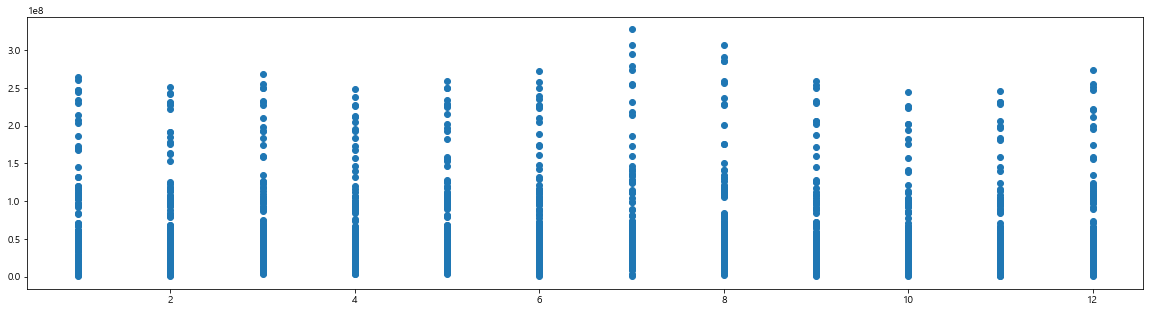

In [11]:
plt.figure(figsize=(20,5))
plt.scatter(x = 'month', y = 'em_g', data = foodwaste)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

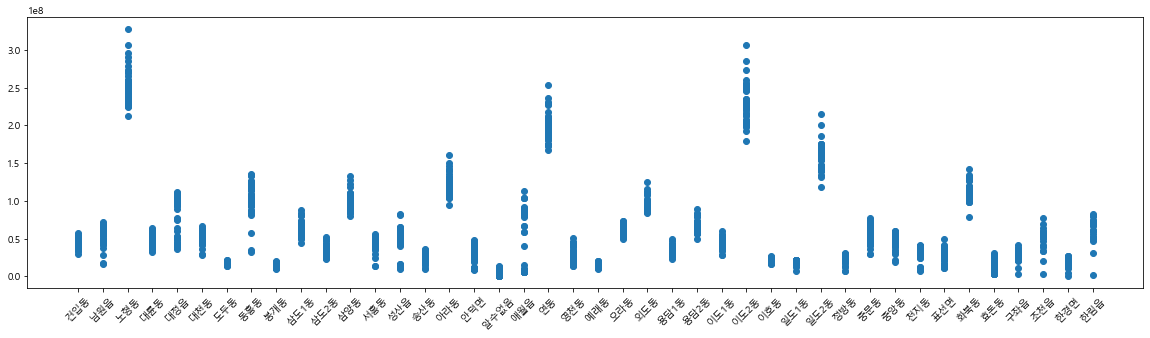

In [12]:
plt.figure(figsize=(20,5))
plt.scatter(x = 'emd_nm', y = 'em_g', data = foodwaste)
plt.xticks(rotation=45)

<AxesSubplot:ylabel='Frequency'>

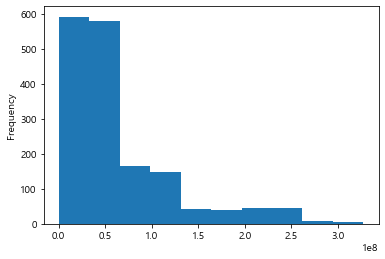

In [13]:
foodwaste['em_g'].plot.hist()

In [14]:
foodwaste['em_g'] = np.log(foodwaste[['em_g']])

<AxesSubplot:ylabel='Frequency'>

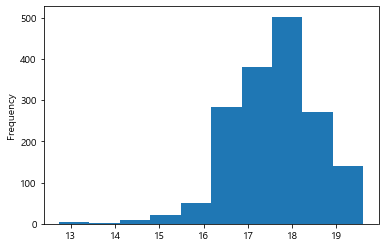

In [15]:
foodwaste['em_g'].plot.hist()

<AxesSubplot:ylabel='em_g'>

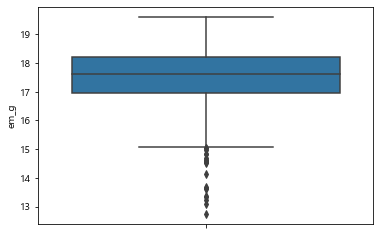

In [16]:
sns.boxplot(y='em_g',data=foodwaste)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
foodwaste['em_g'] = scaler.fit_transform(foodwaste[['em_g']])

In [19]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,0.062786
1,2018,1,남원읍,-0.014238
2,2018,1,노형동,1.921404
3,2018,1,대륜동,0.308802
4,2018,1,대정읍,-0.106610
...,...,...,...,...
1661,2021,6,표선면,-0.048008
1662,2021,6,한경면,-0.489732
1663,2021,6,한림읍,0.691381
1664,2021,6,화북동,0.999399


In [20]:
korean.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


In [21]:
korean['base_date'] = pd.to_datetime(korean['base_date'])

In [22]:
korean['year'] = korean['base_date'].dt.year

In [23]:
korean['month'] = korean['base_date'].dt.month

In [24]:
korean_1 = korean.groupby(['year', 'month', 'emd_nm', 'time', 'sex', 'age'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

<ipython-input-24-0a6939652dce>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  korean_1 = korean.groupby(['year', 'month', 'emd_nm', 'time', 'sex', 'age'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()


In [25]:
korean_1

,year,month,emd_nm,time,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,건입동,1,남성,0,13225.4359,195.5449,5990.7063
1,2018,1,건입동,1,남성,10,16661.0937,232.8026,7112.4676
2,2018,1,건입동,1,남성,20,12463.7000,1427.3652,11522.5354
3,2018,1,건입동,1,남성,30,18364.2568,1232.8307,11243.6760
4,2018,1,건입동,1,남성,40,23707.4037,1956.0728,12957.3228
...,...,...,...,...,...,...,...,...,...
780187,2021,6,효돈동,24,여성,40,9597.4861,52.6554,1595.8753
780188,2021,6,효돈동,24,여성,50,13996.2707,187.3923,1785.5315
780189,2021,6,효돈동,24,여성,60,12244.2810,225.6249,1291.7532
780190,2021,6,효돈동,24,여성,70,7339.7578,181.7260,485.8234


In [26]:
korean_1.loc[:,['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].corr()

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
resd_pop_cnt,1.000000,0.549722,0.647807
work_pop_cnt,0.549722,1.000000,0.794047
visit_pop_cnt,0.647807,0.794047,1.000000


In [27]:
korean1 = pd.get_dummies(korean_1, columns = ['time'])

In [28]:
korean1

,year,month,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24
0,2018,1,건입동,남성,0,13225.4359,195.5449,5990.7063,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,남성,10,16661.0937,232.8026,7112.4676,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,남성,20,12463.7000,1427.3652,11522.5354,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,남성,30,18364.2568,1232.8307,11243.6760,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,남성,40,23707.4037,1956.0728,12957.3228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780187,2021,6,효돈동,여성,40,9597.4861,52.6554,1595.8753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
780188,2021,6,효돈동,여성,50,13996.2707,187.3923,1785.5315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
780189,2021,6,효돈동,여성,60,12244.2810,225.6249,1291.7532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
780190,2021,6,효돈동,여성,70,7339.7578,181.7260,485.8234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
korean1['1h_resd'] = korean1['time_1'] * korean1['resd_pop_cnt']
korean1['2h_resd'] = korean1['time_2'] * korean1['resd_pop_cnt']
korean1['3h_resd'] = korean1['time_3'] * korean1['resd_pop_cnt']
korean1['4h_resd'] = korean1['time_4'] * korean1['resd_pop_cnt']
korean1['5h_resd'] = korean1['time_5'] * korean1['resd_pop_cnt']
korean1['6h_resd'] = korean1['time_6'] * korean1['resd_pop_cnt']
korean1['7h_resd'] = korean1['time_7'] * korean1['resd_pop_cnt']
korean1['8h_resd'] = korean1['time_8'] * korean1['resd_pop_cnt']
korean1['9h_resd'] = korean1['time_9'] * korean1['resd_pop_cnt']
korean1['10h_resd'] = korean1['time_10'] * korean1['resd_pop_cnt']
korean1['11h_resd'] = korean1['time_11'] * korean1['resd_pop_cnt']
korean1['12h_resd'] = korean1['time_12'] * korean1['resd_pop_cnt']
korean1['13h_resd'] = korean1['time_13'] * korean1['resd_pop_cnt']
korean1['14h_resd'] = korean1['time_14'] * korean1['resd_pop_cnt']
korean1['15h_resd'] = korean1['time_15'] * korean1['resd_pop_cnt']
korean1['16h_resd'] = korean1['time_16'] * korean1['resd_pop_cnt']
korean1['17h_resd'] = korean1['time_17'] * korean1['resd_pop_cnt']
korean1['18h_resd'] = korean1['time_18'] * korean1['resd_pop_cnt']
korean1['19h_resd'] = korean1['time_19'] * korean1['resd_pop_cnt']
korean1['20h_resd'] = korean1['time_20'] * korean1['resd_pop_cnt']
korean1['21h_resd'] = korean1['time_21'] * korean1['resd_pop_cnt']
korean1['22h_resd'] = korean1['time_22'] * korean1['resd_pop_cnt']
korean1['23h_resd'] = korean1['time_23'] * korean1['resd_pop_cnt']
korean1['24h_resd'] = korean1['time_24'] * korean1['resd_pop_cnt']

korean1['1h_work'] = korean1['time_1'] * korean1['work_pop_cnt']
korean1['2h_work'] = korean1['time_2'] * korean1['work_pop_cnt']
korean1['3h_work'] = korean1['time_3'] * korean1['work_pop_cnt']
korean1['4h_work'] = korean1['time_4'] * korean1['work_pop_cnt']
korean1['5h_work'] = korean1['time_5'] * korean1['work_pop_cnt']
korean1['6h_work'] = korean1['time_6'] * korean1['work_pop_cnt']
korean1['7h_work'] = korean1['time_7'] * korean1['work_pop_cnt']
korean1['8h_work'] = korean1['time_8'] * korean1['work_pop_cnt']
korean1['9h_work'] = korean1['time_9'] * korean1['work_pop_cnt']
korean1['10h_work'] = korean1['time_10'] * korean1['work_pop_cnt']
korean1['11h_work'] = korean1['time_11'] * korean1['work_pop_cnt']
korean1['12h_work'] = korean1['time_12'] * korean1['work_pop_cnt']
korean1['13h_work'] = korean1['time_13'] * korean1['work_pop_cnt']
korean1['14h_work'] = korean1['time_14'] * korean1['work_pop_cnt']
korean1['15h_work'] = korean1['time_15'] * korean1['work_pop_cnt']
korean1['16h_work'] = korean1['time_16'] * korean1['work_pop_cnt']
korean1['17h_work'] = korean1['time_17'] * korean1['work_pop_cnt']
korean1['18h_work'] = korean1['time_18'] * korean1['work_pop_cnt']
korean1['19h_work'] = korean1['time_19'] * korean1['work_pop_cnt']
korean1['20h_work'] = korean1['time_20'] * korean1['work_pop_cnt']
korean1['21h_work'] = korean1['time_21'] * korean1['work_pop_cnt']
korean1['22h_work'] = korean1['time_22'] * korean1['work_pop_cnt']
korean1['23h_work'] = korean1['time_23'] * korean1['work_pop_cnt']
korean1['24h_work'] = korean1['time_24'] * korean1['work_pop_cnt']

korean1['1h_visit'] = korean1['time_1'] * korean1['visit_pop_cnt']
korean1['2h_visit'] = korean1['time_2'] * korean1['visit_pop_cnt']
korean1['3h_visit'] = korean1['time_3'] * korean1['visit_pop_cnt']
korean1['4h_visit'] = korean1['time_4'] * korean1['visit_pop_cnt']
korean1['5h_visit'] = korean1['time_5'] * korean1['visit_pop_cnt']
korean1['6h_visit'] = korean1['time_6'] * korean1['visit_pop_cnt']
korean1['7h_visit'] = korean1['time_7'] * korean1['visit_pop_cnt']
korean1['8h_visit'] = korean1['time_8'] * korean1['visit_pop_cnt']
korean1['9h_visit'] = korean1['time_9'] * korean1['visit_pop_cnt']
korean1['10h_visit'] = korean1['time_10'] * korean1['visit_pop_cnt']
korean1['11h_visit'] = korean1['time_11'] * korean1['visit_pop_cnt']
korean1['12h_visit'] = korean1['time_12'] * korean1['visit_pop_cnt']
korean1['13h_visit'] = korean1['time_13'] * korean1['visit_pop_cnt']
korean1['14h_visit'] = korean1['time_14'] * korean1['visit_pop_cnt']
korean1['15h_visit'] = korean1['time_15'] * korean1['visit_pop_cnt']
korean1['16h_visit'] = korean1['time_16'] * korean1['visit_pop_cnt']
korean1['17h_visit'] = korean1['time_17'] * korean1['visit_pop_cnt']
korean1['18h_visit'] = korean1['time_18'] * korean1['visit_pop_cnt']
korean1['19h_visit'] = korean1['time_19'] * korean1['visit_pop_cnt']
korean1['20h_visit'] = korean1['time_20'] * korean1['visit_pop_cnt']
korean1['21h_visit'] = korean1['time_21'] * korean1['visit_pop_cnt']
korean1['22h_visit'] = korean1['time_22'] * korean1['visit_pop_cnt']
korean1['23h_visit'] = korean1['time_23'] * korean1['visit_pop_cnt']
korean1['24h_visit'] = korean1['time_24'] * korean1['visit_pop_cnt']

In [30]:
korean1 = korean1.groupby(['year','month','emd_nm'])['1h_resd', '2h_resd', '3h_resd', '4h_resd', '5h_resd', '6h_resd', '7h_resd', '8h_resd', '9h_resd', '10h_resd', '11h_resd', '12h_resd', '13h_resd', '14h_resd', '15h_resd', '16h_resd', '17h_resd', '18h_resd', '19h_resd', '20h_resd', '21h_resd', '22h_resd', '23h_resd', '24h_resd', '1h_work', '2h_work', '3h_work', '4h_work', '5h_work', '6h_work', '7h_work', '8h_work', '9h_work', '10h_work', '11h_work', '12h_work', '13h_work', '14h_work', '15h_work', '16h_work', '17h_work', '18h_work', '19h_work', '20h_work', '21h_work', '22h_work', '23h_work', '24h_work', '1h_visit', '2h_visit', '3h_visit', '4h_visit', '5h_visit', '6h_visit', '7h_visit', '8h_visit', '9h_visit', '10h_visit', '11h_visit', '12h_visit', '13h_visit', '14h_visit', '15h_visit', '16h_visit', '17h_visit', '18h_visit', '19h_visit', '20h_visit', '21h_visit', '22h_visit', '23h_visit', '24h_visit'].sum().reset_index()

<ipython-input-30-0f3e8221e422>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  korean1 = korean1.groupby(['year','month','emd_nm'])['1h_resd', '2h_resd', '3h_resd', '4h_resd', '5h_resd', '6h_resd', '7h_resd', '8h_resd', '9h_resd', '10h_resd', '11h_resd', '12h_resd', '13h_resd', '14h_resd', '15h_resd', '16h_resd', '17h_resd', '18h_resd', '19h_resd', '20h_resd', '21h_resd', '22h_resd', '23h_resd', '24h_resd', '1h_work', '2h_work', '3h_work', '4h_work', '5h_work', '6h_work', '7h_work', '8h_work', '9h_work', '10h_work', '11h_work', '12h_work', '13h_work', '14h_work', '15h_work', '16h_work', '17h_work', '18h_work', '19h_work', '20h_work', '21h_work', '22h_work', '23h_work', '24h_work', '1h_visit', '2h_visit', '3h_visit', '4h_visit', '5h_visit', '6h_visit', '7h_visit', '8h_visit', '9h_visit', '10h_visit', '11h_visit', '12h_visit', '13h_visit', '14h_visit', '15h_visit', '16h_visit', '17h_visit', '18h_visit', '1

In [31]:
korean1

,year,month,emd_nm,1h_resd,2h_resd,3h_resd,4h_resd,5h_resd,6h_resd,7h_resd,8h_resd,9h_resd,10h_resd,11h_resd,12h_resd,13h_resd,14h_resd,15h_resd,16h_resd,17h_resd,18h_resd,19h_resd,20h_resd,21h_resd,22h_resd,23h_resd,24h_resd,1h_work,2h_work,3h_work,4h_work,5h_work,6h_work,7h_work,8h_work,9h_work,10h_work,11h_work,12h_work,13h_work,14h_work,15h_work,16h_work,17h_work,18h_work,19h_work,20h_work,21h_work,22h_work,23h_work,24h_work,1h_visit,2h_visit,3h_visit,4h_visit,5h_visit,6h_visit,7h_visit,8h_visit,9h_visit,10h_visit,11h_visit,12h_visit,13h_visit,14h_visit,15h_visit,16h_visit,17h_visit,18h_visit,19h_visit,20h_visit,21h_visit,22h_visit,23h_visit,24h_visit
0,2018,1,건입동,2.891324e+05,2.896753e+05,2.892181e+05,2.893405e+05,2.883917e+05,2.829207e+05,2.704766e+05,2.461519e+05,2.101557e+05,1.858312e+05,1.695486e+05,1.579041e+05,1.495362e+05,1.421239e+05,1.364529e+05,1.349844e+05,1.378431e+05,1.430333e+05,1.513550e+05,1.572383e+05,1.652176e+05,1.749952e+05,1.850645e+05,2.893917e+05,12816.6600,12255.8185,12004.1090,12034.7881,12613.4190,13801.1658,18253.4714,27234.7332,39785.2815,42120.1314,44494.4996,44476.0565,47282.6742,47827.5445,47488.0957,47978.7569,47194.1771,40302.8240,30016.5942,25695.3459,23993.0207,20742.1447,19160.9588,14363.0473,130826.1332,131964.1028,134871.2551,137340.4284,143631.8501,157410.8514,166285.9165,189848.2929,201993.8036,207962.6582,214993.6758,221378.6579,241932.4511,260406.0767,259694.5877,271995.0258,275691.1323,254072.5044,249196.1500,247368.1115,245751.1248,237131.2127,227920.2900,129230.7300
1,2018,1,구좌읍,3.695405e+05,3.699567e+05,3.703841e+05,3.703842e+05,3.702305e+05,3.686640e+05,3.628983e+05,3.509408e+05,3.362054e+05,3.223875e+05,3.115788e+05,3.048233e+05,2.996424e+05,2.955871e+05,2.936034e+05,2.961881e+05,3.028147e+05,3.080295e+05,3.127748e+05,3.182541e+05,3.253873e+05,3.324478e+05,3.383001e+05,3.677650e+05,12398.4894,12368.6846,12305.0495,12353.1978,12340.5692,12750.2657,15200.9750,30943.4290,49695.7147,55387.0196,57871.2719,59169.6097,59051.1472,56594.6177,55607.7513,52539.2404,47300.6645,36559.9116,24209.6790,19661.8703,16830.6913,15503.3206,14743.7779,12465.0329,143716.7559,143468.0074,144013.3902,144415.9110,145360.3082,149644.6272,168073.5809,189991.8891,218902.7704,252723.6399,291778.2704,317443.4854,325165.6192,333394.6073,331737.1942,319979.7176,283339.5764,214257.9954,176148.9668,167385.4266,166751.9493,166200.5112,164668.5321,141157.5176
2,2018,1,남원읍,4.091708e+05,4.098214e+05,4.095778e+05,4.096552e+05,4.096931e+05,4.080080e+05,4.017183e+05,3.839286e+05,3.604856e+05,3.442303e+05,3.316741e+05,3.216174e+05,3.144421e+05,3.095796e+05,3.070719e+05,3.093567e+05,3.164943e+05,3.268464e+05,3.352752e+05,3.425668e+05,3.505428e+05,3.600368e+05,3.683334e+05,4.081857e+05,13938.6501,13508.4316,13159.0227,13022.5932,12982.2669,13181.6568,15835.7783,26049.5805,43219.2240,47236.0665,49091.3788,50101.6821,49452.8319,49610.6408,48437.9195,46817.9481,43724.8607,34706.8237,23010.5711,20223.9680,18337.8263,16685.0179,15797.9525,14310.1831,176483.7357,176904.4816,179251.7536,179343.5055,180637.5428,183738.4271,200155.6912,229919.9371,253544.9174,281040.9556,305151.8201,312909.1201,301379.3683,301092.2501,299093.4756,292934.7180,272891.4372,231427.5392,208772.3052,203783.3892,204375.1379,203070.2155,200578.1059,176546.8460
3,2018,1,노형동,1.804881e+06,1.817033e+06,1.823529e+06,1.828587e+06,1.827803e+06,1.813477e+06,1.770822e+06,1.639939e+06,1.468698e+06,1.371579e+06,1.299791e+06,1.252014e+06,1.220044e+06,1.193257e+06,1.184785e+06,1.197454e+06,1.233329e+06,1.298870e+06,1.386373e+06,1.442403e+06,1.490050e+06,1.544665e+06,1.598102e+06,1.798742e+06,54297.6605,52175.9097,51762.2597,51636.3235,52257.2458,53072.6511,58187.5427,85310.2567,152212.8949,200299.1062,218076.4418,232276.9255,244242.8483,252414.9893,258384.1987,259592.0093,257105.7755,241372.8681,201861.2862,168891.3920,150100.5980,128172.4735,108971.2621,59612.4351,351975.1216,348480.3065,347960.1838,347097.9075,350375.9420,360975.5615,394287.3657,460244.6163,55000

In [32]:
korean1_1 = korean1[['1h_resd', '2h_resd', '3h_resd', '4h_resd', '5h_resd', '6h_resd', '7h_resd', '8h_resd', '9h_resd', '10h_resd', '11h_resd', '12h_resd', '13h_resd', '14h_resd', '15h_resd', '16h_resd', '17h_resd', '18h_resd', '19h_resd', '20h_resd', '21h_resd', '22h_resd', '23h_resd', '24h_resd']]

<AxesSubplot:>

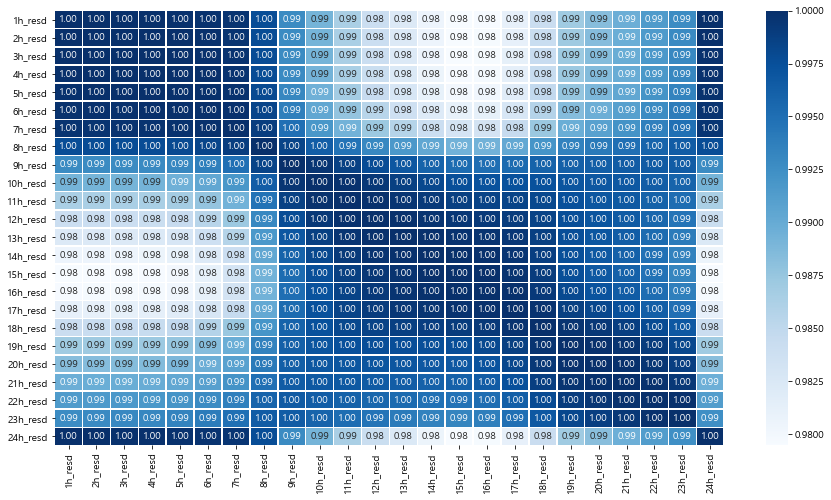

In [33]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean1_1.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [34]:
korean1['resd1'] = korean1['1h_resd'] + korean1['2h_resd'] + korean1['3h_resd'] + korean1['4h_resd'] + korean1['5h_resd'] + korean1['6h_resd'] + korean1['7h_resd'] + korean1['8h_resd'] + korean1['9h_resd'] + korean1['10h_resd'] + korean1['11h_resd'] + korean1['19h_resd'] + korean1['20h_resd'] + korean1['21h_resd'] + korean1['22h_resd'] + korean1['23h_resd'] + korean1['24h_resd']
korean1['resd2'] = korean1['12h_resd'] + korean1['13h_resd'] + korean1['14h_resd'] + korean1['15h_resd'] + korean1['16h_resd'] + korean1['17h_resd'] + korean1['18h_resd']

In [35]:
korean1_2 = korean1[['1h_work', '2h_work', '3h_work', '4h_work', '5h_work', '6h_work', '7h_work', '8h_work', '9h_work', '10h_work', '11h_work', '12h_work', '13h_work', '14h_work', '15h_work', '16h_work', '17h_work', '18h_work', '19h_work', '20h_work', '21h_work', '22h_work', '23h_work', '24h_work']]

<AxesSubplot:>

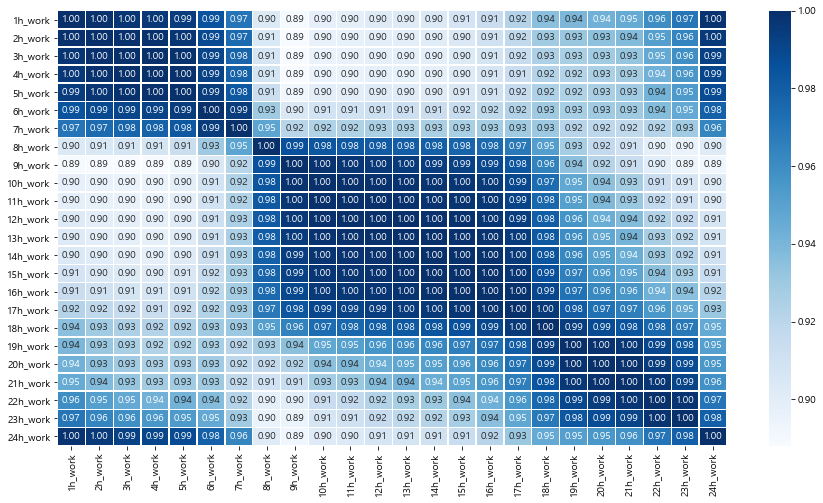

In [36]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean1_2.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [37]:
korean1['work1'] = korean1['1h_work'] + korean1['2h_work'] + korean1['3h_work'] + korean1['4h_work'] + korean1['5h_work'] + korean1['6h_work'] + korean1['7h_work'] + korean1['24h_work']
korean1['work2'] = korean1['8h_work'] + korean1['9h_work'] + korean1['10h_work'] + korean1['11h_work'] + korean1['12h_work'] + korean1['13h_work'] + korean1['14h_work'] + korean1['15h_work'] + korean1['16h_work'] + korean1['17h_work']
korean1['work3'] = korean1['18h_work'] + korean1['19h_work'] + korean1['20h_work'] + korean1['21h_work'] + korean1['22h_work'] + korean1['23h_work']

In [38]:
korean1_3 = korean1[['1h_visit', '2h_visit', '3h_visit', '4h_visit', '5h_visit', '6h_visit', '7h_visit', '8h_visit', '9h_visit', '10h_visit', '11h_visit', '12h_visit', '13h_visit', '14h_visit', '15h_visit', '16h_visit', '17h_visit', '18h_visit', '19h_visit', '20h_visit', '21h_visit', '22h_visit', '23h_visit', '24h_visit']]

<AxesSubplot:>

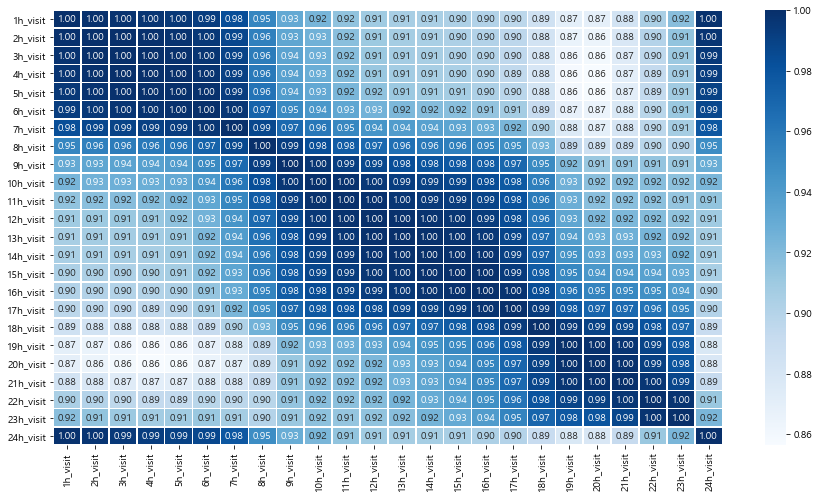

In [39]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean1_3.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [40]:
korean1['visit1'] = korean1['1h_visit'] + korean1['2h_visit'] + korean1['3h_visit'] + korean1['4h_visit'] + korean1['5h_visit'] + korean1['6h_visit'] + korean1['7h_visit'] + korean1['24h_visit']
korean1['visit2'] = korean1['8h_visit'] + korean1['9h_visit'] + korean1['10h_visit'] + korean1['11h_visit'] + korean1['12h_visit'] + korean1['13h_visit'] + korean1['14h_visit'] + korean1['15h_visit'] + korean1['16h_visit'] + korean1['17h_visit']
korean1['visit3'] = korean1['18h_visit'] + korean1['19h_visit'] + korean1['20h_visit'] + korean1['21h_visit'] + korean1['22h_visit'] + korean1['23h_visit']

In [41]:
korean1 = korean1.loc[:,['year', 'month', 'emd_nm', 'resd1', 'resd2', 'work1', 'work2', 'work3', 'visit1', 'visit2', 'visit3']]

In [42]:
korean1

,year,month,emd_nm,resd1,resd2,work1,work2,work3,visit1,visit2,visit3
0,2018,1,건입동,3.934105e+06,1.001878e+06,108142.4791,4.358820e+05,159910.8883,1.131561e+06,2.345896e+06,1.461439e+06
1,2018,1,구좌읍,5.898100e+06,2.100688e+06,102182.2641,5.241605e+05,127509.2507,1.179850e+06,2.864457e+06,1.055413e+06
2,2018,1,남원읍,6.442904e+06,2.205409e+06,109938.5827,4.537421e+05,128762.1595,1.453062e+06,2.849958e+06,1.252007e+06
3,2018,1,노형동,2.772647e+07,8.579753e+06,433002.0281,2.159915e+06,999369.8799,2.865136e+06,7.517440e+06,4.887269e+06
4,2018,1,대륜동,6.428343e+06,1.845897e+06,166097.1836,4.389509e+05,205460.3771,1.885167e+06,2.831956e+06,1.883116e+06
...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,5.475673e+06,1.963145e+06,104178.1018,4.206073e+05,125611.7365,1.242296e+06,2.216429e+06,1.059855e+06
1802,2021,6,한경면,3.838425e+06,1.309285e+06,68676.3531,2.964116e+05,82792.8681,7.303548e+05,1.546365e+06,6.855345e+05
1803,2021,6,한림읍,1.057552e+07,3.835913e+06,207440.3148,8.876714e+05,257217.8133,1.968936e+06,4.027105e+06,1.902899e+06
1804,2021,6,화북동,1.385094e+07,4.002634e+06,144500.0262,8.609953e+05,308704.7259,1.005066e+06,3.438866e+06,2.091771e+06


In [43]:
korean2 = pd.get_dummies(korean_1, columns = ['sex'])

In [44]:
korean2

,year,month,emd_nm,time,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성,sex_여성
0,2018,1,건입동,1,0,13225.4359,195.5449,5990.7063,1,0
1,2018,1,건입동,1,10,16661.0937,232.8026,7112.4676,1,0
2,2018,1,건입동,1,20,12463.7000,1427.3652,11522.5354,1,0
3,2018,1,건입동,1,30,18364.2568,1232.8307,11243.6760,1,0
4,2018,1,건입동,1,40,23707.4037,1956.0728,12957.3228,1,0
...,...,...,...,...,...,...,...,...,...,...
780187,2021,6,효돈동,24,40,9597.4861,52.6554,1595.8753,0,1
780188,2021,6,효돈동,24,50,13996.2707,187.3923,1785.5315,0,1
780189,2021,6,효돈동,24,60,12244.2810,225.6249,1291.7532,0,1
780190,2021,6,효돈동,24,70,7339.7578,181.7260,485.8234,0,1


In [45]:
korean2['resd_남성'] = korean2['sex_남성'] * korean2['resd_pop_cnt']
korean2['resd_여성'] = korean2['sex_여성'] * korean2['resd_pop_cnt']

korean2['work_남성'] = korean2['sex_남성'] * korean2['work_pop_cnt']
korean2['work_여성'] = korean2['sex_여성'] * korean2['work_pop_cnt']

korean2['visit_남성'] = korean2['sex_남성'] * korean2['visit_pop_cnt']
korean2['visit_여성'] = korean2['sex_여성'] * korean2['visit_pop_cnt']

In [46]:
korean2 = korean2.groupby(['year','month','emd_nm'])['resd_남성', 'resd_여성', 'work_남성', 'work_여성', 'visit_남성', 'visit_여성'].sum().reset_index()

<ipython-input-46-961ac38083ee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  korean2 = korean2.groupby(['year','month','emd_nm'])['resd_남성', 'resd_여성', 'work_남성', 'work_여성', 'visit_남성', 'visit_여성'].sum().reset_index()


In [47]:
korean2

,year,month,emd_nm,resd_남성,resd_여성,work_남성,work_여성,visit_남성,visit_여성
0,2018,1,건입동,2.447351e+06,2.488632e+06,4.421103e+05,2.618250e+05,2.758415e+06,2.180482e+06
1,2018,1,구좌읍,4.263261e+06,3.735527e+06,4.567875e+05,2.970645e+05,2.568385e+06,2.531336e+06
2,2018,1,남원읍,4.611618e+06,4.036694e+06,4.136046e+05,2.788383e+05,3.168776e+06,2.386251e+06
3,2018,1,노형동,1.716018e+07,1.914604e+07,1.830870e+06,1.761417e+06,8.047919e+06,7.221926e+06
4,2018,1,대륜동,3.853170e+06,4.421071e+06,4.648448e+05,3.456636e+05,3.535477e+06,3.064762e+06
...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,3.854936e+06,3.583883e+06,3.786139e+05,2.717832e+05,2.310228e+06,2.208352e+06
1802,2021,6,한경면,2.717931e+06,2.429780e+06,2.495798e+05,1.983011e+05,1.595665e+06,1.366589e+06
1803,2021,6,한림읍,7.650214e+06,6.761219e+06,8.712814e+05,4.810482e+05,4.141063e+06,3.757877e+06
1804,2021,6,화북동,8.656262e+06,9.197317e+06,7.866755e+05,5.275245e+05,3.697255e+06,2.838447e+06


<AxesSubplot:>

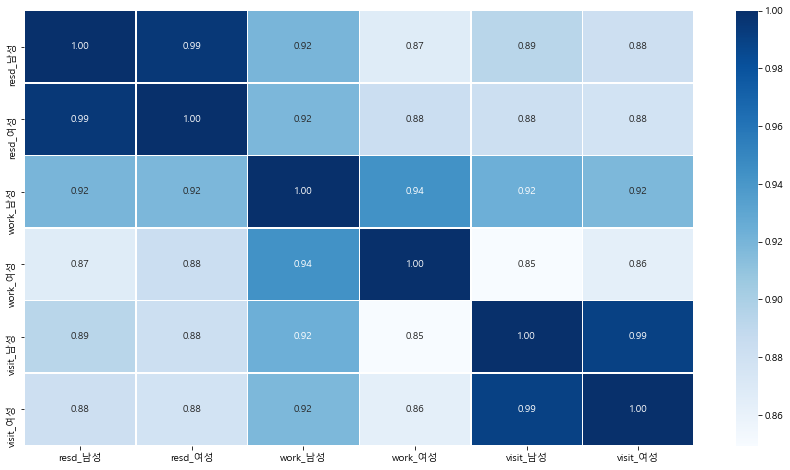

In [48]:
plt.figure(figsize = (15, 8))
sns.heatmap(data=korean2.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [49]:
korean2['resd3'] = korean2['resd_남성'] + korean2['resd_여성']
korean2['visit4'] = korean2['visit_남성'] + korean2['visit_여성']

In [50]:
korean2 = korean2.loc[:,['year', 'month', 'emd_nm', 'resd3', 'work_남성', 'work_여성', 'visit4']]

In [51]:
korean2

,year,month,emd_nm,resd3,work_남성,work_여성,visit4
0,2018,1,건입동,4.935983e+06,4.421103e+05,2.618250e+05,4.938897e+06
1,2018,1,구좌읍,7.998788e+06,4.567875e+05,2.970645e+05,5.099720e+06
2,2018,1,남원읍,8.648312e+06,4.136046e+05,2.788383e+05,5.555027e+06
3,2018,1,노형동,3.630623e+07,1.830870e+06,1.761417e+06,1.526984e+07
4,2018,1,대륜동,8.274240e+06,4.648448e+05,3.456636e+05,6.600239e+06
...,...,...,...,...,...,...,...
1801,2021,6,표선면,7.438819e+06,3.786139e+05,2.717832e+05,4.518580e+06
1802,2021,6,한경면,5.147711e+06,2.495798e+05,1.983011e+05,2.962254e+06
1803,2021,6,한림읍,1.441143e+07,8.712814e+05,4.810482e+05,7.898940e+06
1804,2021,6,화북동,1.785358e+07,7.866755e+05,5.275245e+05,6.535703e+06


In [52]:
korean3 = pd.get_dummies(korean_1, columns = ['age'])

In [53]:
korean3

,year,month,emd_nm,time,sex,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,age_0,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80
0,2018,1,건입동,1,남성,13225.4359,195.5449,5990.7063,1,0,0,0,0,0,0,0,0
1,2018,1,건입동,1,남성,16661.0937,232.8026,7112.4676,0,1,0,0,0,0,0,0,0
2,2018,1,건입동,1,남성,12463.7000,1427.3652,11522.5354,0,0,1,0,0,0,0,0,0
3,2018,1,건입동,1,남성,18364.2568,1232.8307,11243.6760,0,0,0,1,0,0,0,0,0
4,2018,1,건입동,1,남성,23707.4037,1956.0728,12957.3228,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780187,2021,6,효돈동,24,여성,9597.4861,52.6554,1595.8753,0,0,0,0,1,0,0,0,0
780188,2021,6,효돈동,24,여성,13996.2707,187.3923,1785.5315,0,0,0,0,0,1,0,0,0
780189,2021,6,효돈동,24,여성,12244.2810,225.6249,1291.7532,0,0,0,0,0,0,1,0,0
780190,2021,6,효돈동,24,여성,7339.7578,181.7260,485.8234,0,0,0,0,0,0,0,1,0


In [54]:
korean3['0_resd'] = korean3['age_0'] * korean3['resd_pop_cnt']
korean3['10_resd'] = korean3['age_10'] * korean3['resd_pop_cnt']
korean3['20_resd'] = korean3['age_20'] * korean3['resd_pop_cnt']
korean3['30_resd'] = korean3['age_30'] * korean3['resd_pop_cnt']
korean3['40_resd'] = korean3['age_40'] * korean3['resd_pop_cnt']
korean3['50_resd'] = korean3['age_50'] * korean3['resd_pop_cnt']
korean3['60_resd'] = korean3['age_60'] * korean3['resd_pop_cnt']
korean3['70_resd'] = korean3['age_70'] * korean3['resd_pop_cnt']
korean3['80_resd'] = korean3['age_80'] * korean3['resd_pop_cnt']

korean3['0_work'] = korean3['age_0'] * korean3['work_pop_cnt']
korean3['10_work'] = korean3['age_10'] * korean3['work_pop_cnt']
korean3['20_work'] = korean3['age_20'] * korean3['work_pop_cnt']
korean3['30_work'] = korean3['age_30'] * korean3['work_pop_cnt']
korean3['40_work'] = korean3['age_40'] * korean3['work_pop_cnt']
korean3['50_work'] = korean3['age_50'] * korean3['work_pop_cnt']
korean3['60_work'] = korean3['age_60'] * korean3['work_pop_cnt']
korean3['70_work'] = korean3['age_70'] * korean3['work_pop_cnt']
korean3['80_work'] = korean3['age_80'] * korean3['work_pop_cnt']

korean3['0_visit'] = korean3['age_0'] * korean3['visit_pop_cnt']
korean3['10_visit'] = korean3['age_10'] * korean3['visit_pop_cnt']
korean3['20_visit'] = korean3['age_20'] * korean3['visit_pop_cnt']
korean3['30_visit'] = korean3['age_30'] * korean3['visit_pop_cnt']
korean3['40_visit'] = korean3['age_40'] * korean3['visit_pop_cnt']
korean3['50_visit'] = korean3['age_50'] * korean3['visit_pop_cnt']
korean3['60_visit'] = korean3['age_60'] * korean3['visit_pop_cnt']
korean3['70_visit'] = korean3['age_70'] * korean3['visit_pop_cnt']
korean3['80_visit'] = korean3['age_80'] * korean3['visit_pop_cnt']

In [55]:
korean3 = korean3.groupby(['year','month','emd_nm'])['0_resd', '10_resd', '20_resd', '30_resd', '40_resd', '50_resd', '60_resd', '70_resd', '80_resd', '0_work', '10_work', '20_work', '30_work', '40_work', '50_work', '60_work', '70_work', '80_work', '0_visit', '10_visit', '20_visit', '30_visit', '40_visit', '50_visit', '60_visit', '70_visit', '80_visit'].sum().reset_index()

<ipython-input-55-7b120526a193>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  korean3 = korean3.groupby(['year','month','emd_nm'])['0_resd', '10_resd', '20_resd', '30_resd', '40_resd', '50_resd', '60_resd', '70_resd', '80_resd', '0_work', '10_work', '20_work', '30_work', '40_work', '50_work', '60_work', '70_work', '80_work', '0_visit', '10_visit', '20_visit', '30_visit', '40_visit', '50_visit', '60_visit', '70_visit', '80_visit'].sum().reset_index()


In [56]:
korean3

,year,month,emd_nm,0_resd,10_resd,20_resd,30_resd,40_resd,50_resd,60_resd,70_resd,80_resd,0_work,10_work,20_work,30_work,40_work,50_work,60_work,70_work,80_work,0_visit,10_visit,20_visit,30_visit,40_visit,50_visit,60_visit,70_visit,80_visit
0,2018,1,건입동,4.841377e+05,5.503146e+05,4.614613e+05,6.003917e+05,8.086202e+05,8.678591e+05,6.738702e+05,3.284662e+05,160861.8593,15636.7337,17873.3084,119452.8790,115043.2452,171766.6456,172668.6262,65106.7481,18030.0989,8357.0329,4.155229e+05,4.768601e+05,6.705997e+05,6.858788e+05,9.326828e+05,9.424426e+05,5.035404e+05,200001.6958,111368.1124
1,2018,1,구좌읍,6.391018e+05,7.145347e+05,5.448329e+05,9.754915e+05,1.439198e+06,1.645562e+06,9.783388e+05,6.175131e+05,444216.3325,54008.9222,61799.1760,91461.7613,128767.4846,165130.2851,181433.2599,49216.9094,13945.9096,8088.2727,4.497008e+05,5.214540e+05,9.229337e+05,7.962427e+05,8.807930e+05,8.478428e+05,4.255992e+05,162936.9753,92217.0487
2,2018,1,남원읍,6.615991e+05,8.458515e+05,5.658772e+05,8.727973e+05,1.599364e+06,1.816164e+06,1.102419e+06,7.392267e+05,445013.8096,28004.5979,31907.6103,71084.7759,97851.0128,179303.2041,184630.1705,66659.1347,21358.2482,11644.1207,5.568423e+05,6.512290e+05,7.466630e+05,6.754732e+05,1.012112e+06,1.036980e+06,5.459012e+05,214534.7390,115291.3566
3,2018,1,노형동,4.154375e+06,6.072070e+06,3.762610e+06,4.288948e+06,7.235092e+06,5.994802e+06,2.746769e+06,1.343193e+06,708367.7205,366115.8397,416955.0420,564359.5269,705217.8644,710769.7711,517071.3648,184863.4863,79876.8165,47057.6425,1.688955e+06,1.940453e+06,2.224211e+06,2.082444e+06,2.787876e+06,2.426364e+06,1.266717e+06,545888.4448,306936.1630
4,2018,1,대륜동,1.034773e+06,8.281633e+05,6.104582e+05,1.363320e+06,1.563599e+06,1.261973e+06,9.246122e+05,4.693201e+05,218021.0771,53661.2385,60067.5497,103479.9961,137686.0535,199968.5299,155899.3460,67254.1936,20548.4482,11943.0780,7.157854e+05,8.340061e+05,8.994594e+05,9.044689e+05,1.169700e+06,1.021471e+06,6.100210e+05,286041.7661,159285.9304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,7.105174e+05,6.444557e+05,5.322528e+05,5.931158e+05,1.177028e+06,1.519456e+06,1.203867e+06,7.194382e+05,338687.9824,48559.8268,48393.1028,71202.8720,83349.6611,141490.6498,154989.6571,62755.3442,25858.9109,13797.0969,2.584531e+05,2.484999e+05,5.335426e+05,8.188268e+05,8.429920e+05,9.269085e+05,6.066246e+05,192835.4713,89897.1674
1802,2021,6,한경면,4.517969e+05,4.088130e+05,2.283927e+05,4.547251e+05,9.556028e+05,8.669298e+05,8.466517e+05,5.682829e+05,366516.0361,25663.0710,21924.4187,43260.8866,55826.2693,107488.9758,109636.2378,54849.9307,19495.7954,9735.2519,1.359012e+05,1.264244e+05,4.523774e+05,5.800817e+05,5.315840e+05,5.662069e+05,3.686089e+05,136741.1962,64328.6080
1803,2021,6,한림읍,1.362105e+06,1.316193e+06,1.092337e+06,1.543304e+06,2.418957e+06,2.671289e+06,2.204322e+06,1.153125e+06,649800.0724,143991.0711,148191.7808,131762.2869,178855.6624,273626.4963,280664.6733,133883.9478,41630.2310,19723.3874,5.174374e+05,4.985546e+05,1.476801e+06,1.486972e+06,1.370296e+06,1.288548e+06,8.365092e+05,289586.6550,134235.1103
1804,2021,6,화북동,2.767052e+06,2.713246e+06,1.700478e+06,1.640708e+06,2.885761e+06,3.030978e+06,1.778029e+06,8.963489e+05,440978.2906,101934.3919,107333.9489,181529.8522,184247.7274,305642.4279,276403.5466,118397.2951,26055.0124,12655.8102,9.813794e+05,9.662724e+05,6.893501e+05,7.482570e+05,1.098240e+06,1.038341e+06,6.600029e+05,235777.2705,118083.2805


<AxesSubplot:>

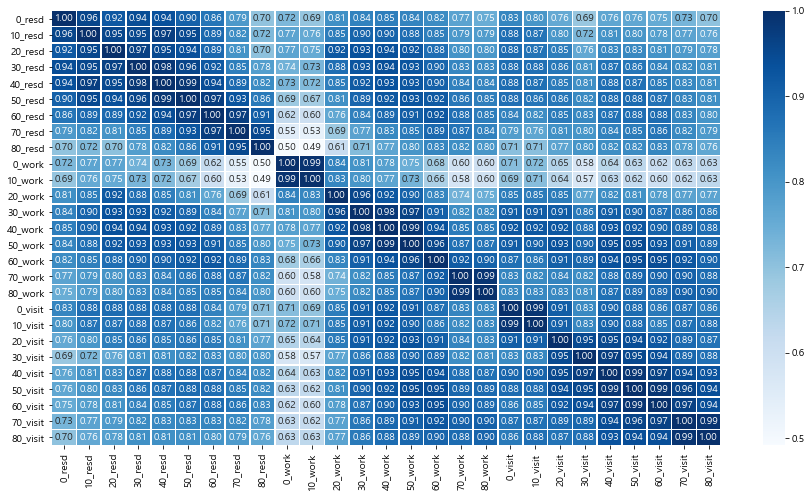

In [57]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean3.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [58]:
korean3['resd4'] = korean3['0_resd'] + korean3['10_resd'] + korean3['20_resd'] + korean3['30_resd'] + korean3['40_resd'] + korean3['50_resd']
korean3['resd5'] = korean3['60_resd'] + korean3['70_resd'] + korean3['80_resd']

korean3['work4'] = korean3['0_work'] + korean3['10_work']
korean3['work5'] = korean3['20_work'] + korean3['30_work'] + korean3['40_work'] + korean3['50_work'] + korean3['60_work']
korean3['work6'] = korean3['70_work'] + korean3['80_work']

korean3['visit5'] = korean3['0_visit'] + korean3['10_visit']
korean3['visit6'] = korean3['20_visit'] + korean3['30_visit'] + korean3['40_visit'] + korean3['50_visit'] + korean3['60_visit']
korean3['visit7'] = korean3['70_visit'] + korean3['80_visit']

In [59]:
korean3 = korean3.loc[:,['year', 'month', 'emd_nm', 'resd4', 'resd5', 'work4', 'work5', 'work6', 'visit5', 'visit6', 'visit7']]

In [60]:
korean3

,year,month,emd_nm,resd4,resd5,work4,work5,work6,visit5,visit6,visit7
0,2018,1,건입동,3.772785e+06,1.163198e+06,33510.0421,6.440381e+05,26387.1318,8.923830e+05,3.735144e+06,311369.8082
1,2018,1,구좌읍,5.958720e+06,2.040068e+06,115808.0982,6.160097e+05,22034.1823,9.711548e+05,3.873411e+06,255154.0240
2,2018,1,남원읍,6.361652e+06,2.286660e+06,59912.2082,5.995283e+05,33002.3689,1.208071e+06,4.017129e+06,329826.0956
3,2018,1,노형동,3.150790e+07,4.798329e+06,783070.8817,2.682282e+06,126934.4590,3.629408e+06,1.078761e+07,852824.6078
4,2018,1,대륜동,6.662287e+06,1.611953e+06,113728.7882,6.642881e+05,32491.5262,1.549791e+06,4.605120e+06,445327.6965
...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,5.176826e+06,2.261993e+06,96952.9296,5.137882e+05,39656.0078,5.069531e+05,3.728895e+06,282732.6387
1802,2021,6,한경면,3.366260e+06,1.781451e+06,47587.4897,3.710623e+05,29231.0473,2.623255e+05,2.498859e+06,201069.8042
1803,2021,6,한림읍,1.040419e+07,4.007247e+06,292182.8519,9.987931e+05,61353.6184,1.015992e+06,6.459126e+06,423821.7653
1804,2021,6,화북동,1.473822e+07,3.115356e+06,209268.3408,1.066221e+06,38710.8226,1.947652e+06,4.234190e+06,353860.5510


In [61]:
korean4 = korean1.merge(korean2, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [62]:
korean5 = korean4.merge(korean3, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [63]:
korean5

,year,month,emd_nm,resd1,resd2,work1,work2,work3,visit1,visit2,visit3,resd3,work_남성,work_여성,visit4,resd4,resd5,work4,work5,work6,visit5,visit6,visit7
0,2018,1,건입동,3.934105e+06,1.001878e+06,108142.4791,4.358820e+05,159910.8883,1.131561e+06,2.345896e+06,1.461439e+06,4.935983e+06,4.421103e+05,2.618250e+05,4.938897e+06,3.772785e+06,1.163198e+06,33510.0421,6.440381e+05,26387.1318,8.923830e+05,3.735144e+06,311369.8082
1,2018,1,구좌읍,5.898100e+06,2.100688e+06,102182.2641,5.241605e+05,127509.2507,1.179850e+06,2.864457e+06,1.055413e+06,7.998788e+06,4.567875e+05,2.970645e+05,5.099720e+06,5.958720e+06,2.040068e+06,115808.0982,6.160097e+05,22034.1823,9.711548e+05,3.873411e+06,255154.0240
2,2018,1,남원읍,6.442904e+06,2.205409e+06,109938.5827,4.537421e+05,128762.1595,1.453062e+06,2.849958e+06,1.252007e+06,8.648312e+06,4.136046e+05,2.788383e+05,5.555027e+06,6.361652e+06,2.286660e+06,59912.2082,5.995283e+05,33002.3689,1.208071e+06,4.017129e+06,329826.0956
3,2018,1,노형동,2.772647e+07,8.579753e+06,433002.0281,2.159915e+06,999369.8799,2.865136e+06,7.517440e+06,4.887269e+06,3.630623e+07,1.830870e+06,1.761417e+06,1.526984e+07,3.150790e+07,4.798329e+06,783070.8817,2.682282e+06,126934.4590,3.629408e+06,1.078761e+07,852824.6078
4,2018,1,대륜동,6.428343e+06,1.845897e+06,166097.1836,4.389509e+05,205460.3771,1.885167e+06,2.831956e+06,1.883116e+06,8.274240e+06,4.648448e+05,3.456636e+05,6.600239e+06,6.662287e+06,1.611953e+06,113728.7882,6.642881e+05,32491.5262,1.549791e+06,4.605120e+06,445327.6965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,5.475673e+06,1.963145e+06,104178.1018,4.206073e+05,125611.7365,1.242296e+06,2.216429e+06,1.059855e+06,7.438819e+06,3.786139e+05,2.717832e+05,4.518580e+06,5.176826e+06,2.261993e+06,96952.9296,5.137882e+05,39656.0078,5.069531e+05,3.728895e+06,282732.6387
1802,2021,6,한경면,3.838425e+06,1.309285e+06,68676.3531,2.964116e+05,82792.8681,7.303548e+05,1.546365e+06,6.855345e+05,5.147711e+06,2.495798e+05,1.983011e+05,2.962254e+06,3.366260e+06,1.781451e+06,47587.4897,3.710623e+05,29231.0473,2.623255e+05,2.498859e+06,201069.8042
1803,2021,6,한림읍,1.057552e+07,3.835913e+06,207440.3148,8.876714e+05,257217.8133,1.968936e+06,4.027105e+06,1.902899e+06,1.441143e+07,8.712814e+05,4.810482e+05,7.898940e+06,1.040419e+07,4.007247e+06,292182.8519,9.987931e+05,61353.6184,1.015992e+06,6.459126e+06,423821.7653
1804,2021,6,화북동,1.385094e+07,4.002634e+06,144500.0262,8.609953e+05,308704.7259,1.005066e+06,3.438866e+06,2.091771e+06,1.785358e+07,7.866755e+05,5.275245e+05,6.535703e+06,1.473822e+07,3.115356e+06,209268.3408,1.066221e+06,38710.8226,1.947652e+06,4.234190e+06,353860.5510


<AxesSubplot:>

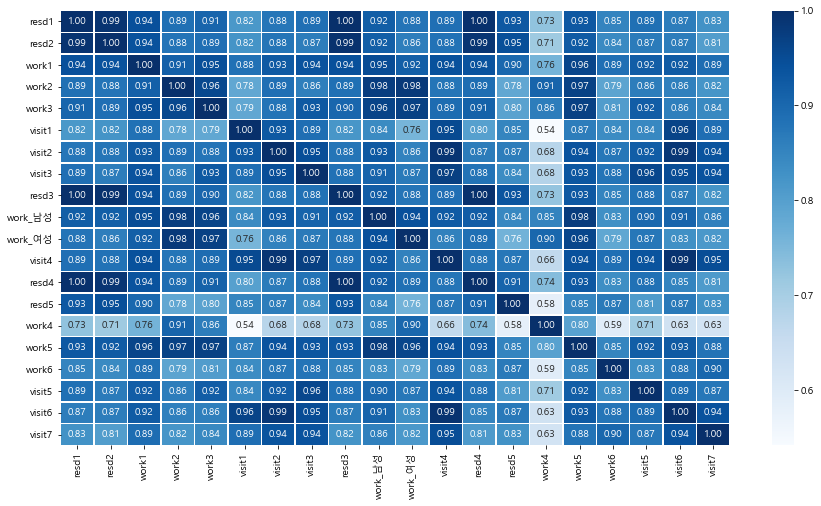

In [64]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean5.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [65]:
korean5['resd_time'] = korean5['resd1'] + korean5['resd2']
korean5['work_time'] = korean5['work1'] + korean5['work2'] + korean5['work3']
korean5['visit_time'] = korean5['visit1'] + korean5['visit2'] + korean5['visit3']

korean5['resd_sex'] = korean5['resd3']
korean5['work_sex'] = korean5['work_남성'] + korean5['work_여성']
korean5['visit_sex']= korean5['visit4']

korean5['resd_age'] = korean5['resd4'] + korean5['resd5']
korean5['work_age_0-10'] = korean5['work4']
korean5['work_age_-20'] = korean5['work5'] + korean5['work6']
korean5['visit_age'] = korean5['visit5'] + korean5['visit6'] + korean5['visit7']

In [66]:
korean5 = korean5.loc[:,['year', 'month', 'emd_nm', 'resd_time', 'work_time', 'visit_time', 'resd_sex', 'work_sex', 'visit_sex', 'resd_age', 'work_age_0-10', 'work_age_-20', 'visit_age']]

In [67]:
korean5

,year,month,emd_nm,resd_time,work_time,visit_time,resd_sex,work_sex,visit_sex,resd_age,work_age_0-10,work_age_-20,visit_age
0,2018,1,건입동,4.935983e+06,7.039353e+05,4.938897e+06,4.935983e+06,7.039353e+05,4.938897e+06,4.935983e+06,33510.0421,6.704253e+05,4.938897e+06
1,2018,1,구좌읍,7.998788e+06,7.538520e+05,5.099720e+06,7.998788e+06,7.538520e+05,5.099720e+06,7.998788e+06,115808.0982,6.380439e+05,5.099720e+06
2,2018,1,남원읍,8.648312e+06,6.924429e+05,5.555027e+06,8.648312e+06,6.924429e+05,5.555027e+06,8.648312e+06,59912.2082,6.325307e+05,5.555027e+06
3,2018,1,노형동,3.630623e+07,3.592287e+06,1.526984e+07,3.630623e+07,3.592287e+06,1.526984e+07,3.630623e+07,783070.8817,2.809216e+06,1.526984e+07
4,2018,1,대륜동,8.274240e+06,8.105084e+05,6.600239e+06,8.274240e+06,8.105084e+05,6.600239e+06,8.274240e+06,113728.7882,6.967796e+05,6.600239e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,7.438819e+06,6.503971e+05,4.518580e+06,7.438819e+06,6.503971e+05,4.518580e+06,7.438819e+06,96952.9296,5.534442e+05,4.518580e+06
1802,2021,6,한경면,5.147711e+06,4.478808e+05,2.962254e+06,5.147711e+06,4.478808e+05,2.962254e+06,5.147711e+06,47587.4897,4.002933e+05,2.962254e+06
1803,2021,6,한림읍,1.441143e+07,1.352330e+06,7.898940e+06,1.441143e+07,1.352330e+06,7.898940e+06,1.441143e+07,292182.8519,1.060147e+06,7.898940e+06
1804,2021,6,화북동,1.785358e+07,1.314200e+06,6.535703e+06,1.785358e+07,1.314200e+06,6.535703e+06,1.785358e+07,209268.3408,1.104932e+06,6.535703e+06


In [68]:
korean_resd = korean5[['resd_time', 'resd_sex', 'resd_age']]

<AxesSubplot:>

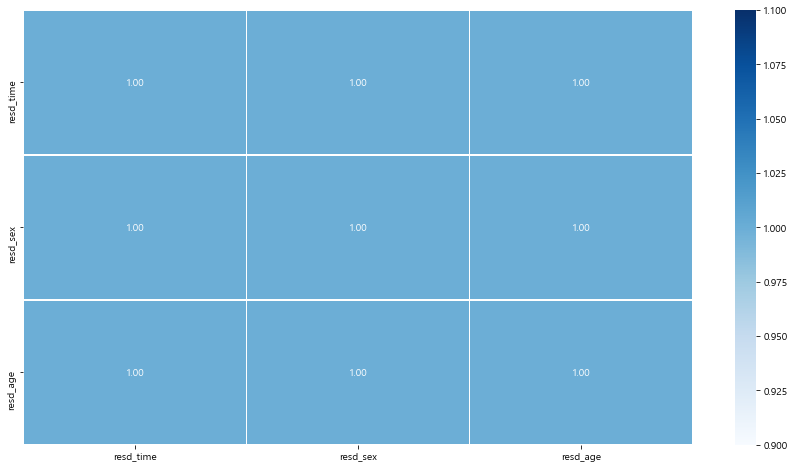

In [69]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean_resd.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [70]:
korean_work = korean5[['work_time', 'work_sex', 'work_age_0-10', 'work_age_-20']]

<AxesSubplot:>

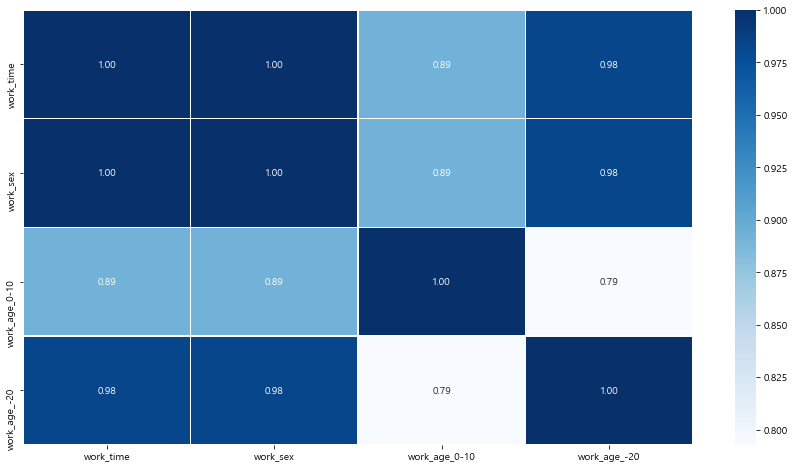

In [71]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean_work.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [72]:
korean_visit = korean5[['visit_time', 'visit_sex', 'visit_age']]

<AxesSubplot:>

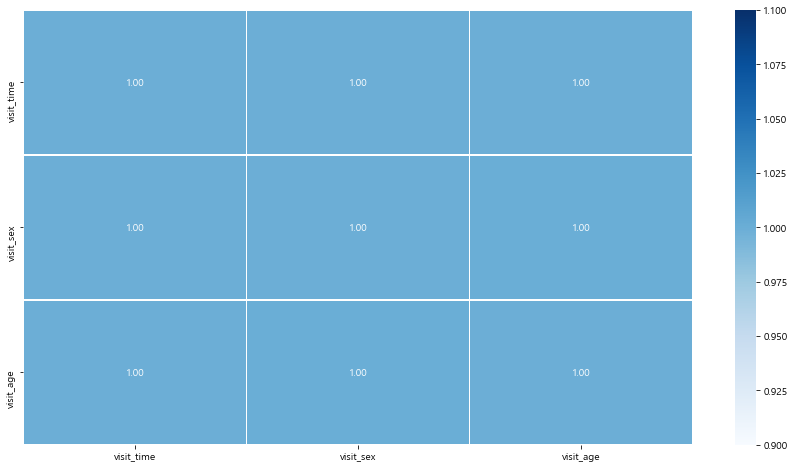

In [73]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean_visit.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [74]:
korean6 = korean5.drop(['resd_time', 'work_time', 'visit_time', 'resd_sex', 'work_sex', 'visit_sex'], axis = 1)

In [75]:
korean6

,year,month,emd_nm,resd_age,work_age_0-10,work_age_-20,visit_age
0,2018,1,건입동,4.935983e+06,33510.0421,6.704253e+05,4.938897e+06
1,2018,1,구좌읍,7.998788e+06,115808.0982,6.380439e+05,5.099720e+06
2,2018,1,남원읍,8.648312e+06,59912.2082,6.325307e+05,5.555027e+06
3,2018,1,노형동,3.630623e+07,783070.8817,2.809216e+06,1.526984e+07
4,2018,1,대륜동,8.274240e+06,113728.7882,6.967796e+05,6.600239e+06
...,...,...,...,...,...,...,...
1801,2021,6,표선면,7.438819e+06,96952.9296,5.534442e+05,4.518580e+06
1802,2021,6,한경면,5.147711e+06,47587.4897,4.002933e+05,2.962254e+06
1803,2021,6,한림읍,1.441143e+07,292182.8519,1.060147e+06,7.898940e+06
1804,2021,6,화북동,1.785358e+07,209268.3408,1.104932e+06,6.535703e+06


<AxesSubplot:>

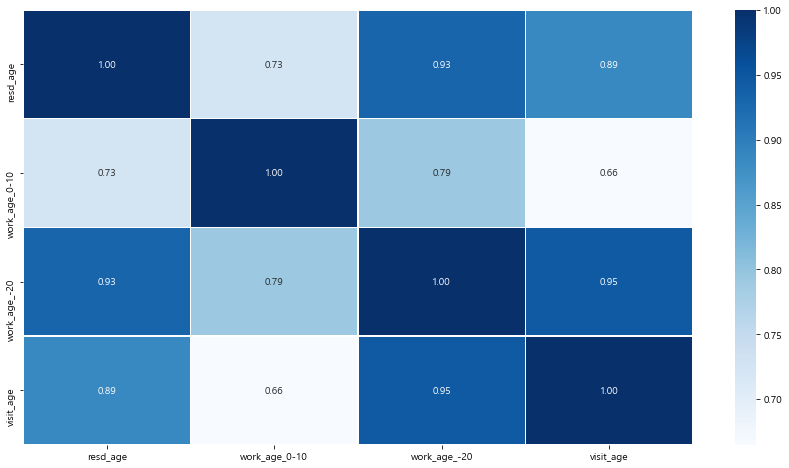

In [76]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean6.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [77]:
korean6['resd_work20_visit_age'] = korean6['resd_age'] + korean6['work_age_-20'] + korean6['visit_age']

In [78]:
korean7 = korean6.loc[:,['year', 'month', 'emd_nm', 'resd_work20_visit_age', 'work_age_0-10']]

In [79]:
korean7

,year,month,emd_nm,resd_work20_visit_age,work_age_0-10
0,2018,1,건입동,1.054531e+07,33510.0421
1,2018,1,구좌읍,1.373655e+07,115808.0982
2,2018,1,남원읍,1.483587e+07,59912.2082
3,2018,1,노형동,5.438529e+07,783070.8817
4,2018,1,대륜동,1.557126e+07,113728.7882
...,...,...,...,...,...
1801,2021,6,표선면,1.251084e+07,96952.9296
1802,2021,6,한경면,8.510259e+06,47587.4897
1803,2021,6,한림읍,2.337052e+07,292182.8519
1804,2021,6,화북동,2.549421e+07,209268.3408


In [80]:
korean7.to_csv('korean_final_final.csv')

<AxesSubplot:>

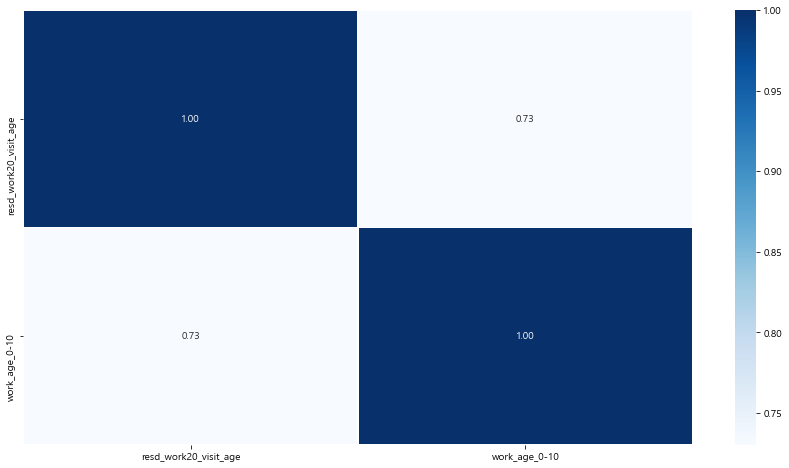

In [81]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = korean7.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

<AxesSubplot:ylabel='Frequency'>

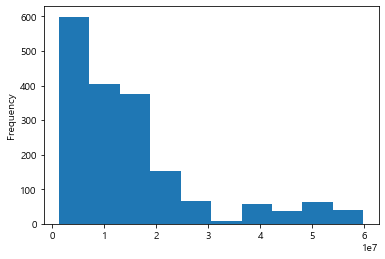

In [82]:
korean7['resd_work20_visit_age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

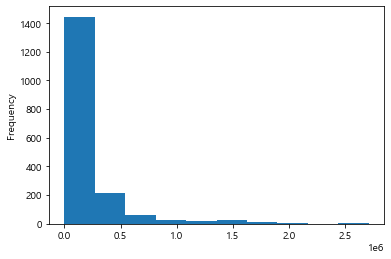

In [83]:
korean7['work_age_0-10'].plot.hist()

In [84]:
korean7['resd_work20_visit_age'] = np.log(korean7['resd_work20_visit_age'] + 1)
korean7['work_age_0-10'] = np.log(korean7['work_age_0-10'] + 1)

<AxesSubplot:ylabel='Frequency'>

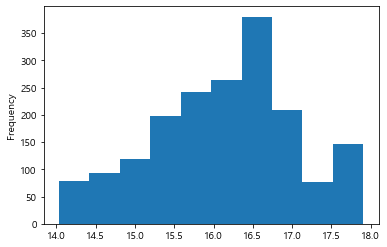

In [85]:
korean7['resd_work20_visit_age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

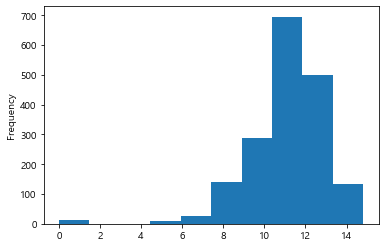

In [86]:
korean7['work_age_0-10'].plot.hist()

<AxesSubplot:ylabel='resd_work20_visit_age'>

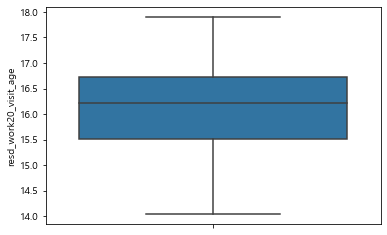

In [87]:
sns.boxplot(y = 'resd_work20_visit_age', data = korean7)

<AxesSubplot:ylabel='work_age_0-10'>

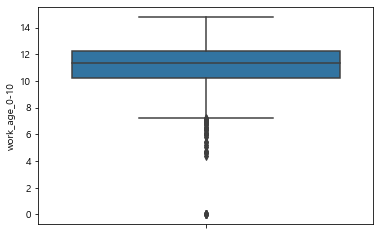

In [88]:
sns.boxplot(y = 'work_age_0-10', data = korean7)

In [89]:
korean_final = korean7.copy()

In [90]:
korean_final['resd_work20_visit_age'] = scaler.fit_transform(korean7[['resd_work20_visit_age']])
korean_final['work_age_0-10'] = scaler.fit_transform(korean7[['work_age_0-10']])

In [91]:
korean_final

,year,month,emd_nm,resd_work20_visit_age,work_age_0-10
0,2018,1,건입동,0.026303,-0.358739
1,2018,1,구좌읍,0.316271,0.302699
2,2018,1,남원읍,0.400710,-0.048829
3,2018,1,노형동,1.825488,1.322154
4,2018,1,대륜동,0.453771,0.293035
...,...,...,...,...,...
1801,2021,6,표선면,0.213760,0.207912
1802,2021,6,한경면,-0.208858,-0.171671
1803,2021,6,한림읍,0.899120,0.796318
1804,2021,6,화북동,0.994515,0.618294


In [92]:
korean_final_merge = foodwaste.merge(korean_final, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [93]:
korean_final_merge

,year,month,emd_nm,em_g,resd_work20_visit_age,work_age_0-10
0,2018,1,건입동,0.062786,0.026303,-0.358739
1,2018,1,남원읍,-0.014238,0.400710,-0.048829
2,2018,1,노형동,1.921404,1.825488,1.322154
3,2018,1,대륜동,0.308802,0.453771,0.293035
4,2018,1,대정읍,-0.106610,0.502035,-0.006751
...,...,...,...,...,...,...
1629,2021,6,표선면,-0.048008,0.213760,0.207912
1630,2021,6,한경면,-0.489732,-0.208858,-0.171671
1631,2021,6,한림읍,0.691381,0.899120,0.796318
1632,2021,6,화북동,0.999399,0.994515,0.618294


In [94]:
korean_x = korean_final_merge.loc[:, ['resd_work20_visit_age', 'work_age_0-10']]
korean_y = korean_final_merge.loc[:, ['em_g']]

In [95]:
korean_x = sm.add_constant(korean_x)

In [96]:
model = sm.OLS(korean_y, korean_x)

In [97]:
result = model.fit()

In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     727.0
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          1.90e-226
Time:                        19:55:06   Log-Likelihood:                -1660.2
No. Observations:                1634   AIC:                             3326.
Df Residuals:                    1631   BIC:                             3343.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0051      0.017     -0.304      0.761      -0.038       0.028
resd_work20_visit_age     0.5822      0.031     18.953      0.000       0.522       0.642
work_age_0-10             0.1211      0.035      3.500      0.000       0.053       0.189
==============================================================================
Omnibus:                      614.510   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2668.749
Skew:                          -1.768   Prob(JB):                         0.00
Kurtosis:                       8.167   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""